<a href="https://colab.research.google.com/github/TrishlaM/Tensorflow-2.0.0/blob/master/CNN_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0-rc3'

# **Data preprocessing**

In [2]:
#Loading the dataset

class_names  = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


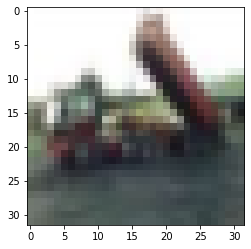

In [3]:
#Image normalization

X_train = X_train/255
X_test = X_test/255

plt.imshow(X_train[2])

In [4]:
X_train.shape

(50000, 32, 32, 3)

# **Building a convolution neural network**

**Defining the model**

In [0]:
model = tf.keras.models.Sequential()

**Adding the first convolutional layer**

Hyperparameters :

1.   filters = 32
2.   kernel_size = 3
3.   padding = same
4.   activation = relu
5.   input shape = (32, 32, 3)



In [0]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", input_shape = [32, 32, 3]))

**Adding the second convolutional layer and the max pooling layer**

Hyperparameters - CNN layer :

1.   filters = 32
2.   kernel_size = 3
3.   padding = same
4.   activation = relu

Hyperparameters - Pooling layer :

1.   pool size = 2
2.   strides = 2
3.   padding = valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "valid"))

**Adding the third convolutional layer**

Hyperparameters - CNN layer :

1.   filters = 64
2.   kernel_size = 3
3.   padding = same
4.   activation = relu
5.   input_shape = (32, 32, 3)



In [0]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

**Adding the fourth convolutional layer and max-pooling layer**

Hyperparameters - CNN layer :

1.   filters = 64
2.   kernel_size = 3
3.   padding = same
4.   activation = relu

Hyperparameters - Pooling layer :

1.   pool size = 2
2.   strides = 2
3.   padding = valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "valid"))

**Adding the flattening layer**


In [0]:
model.add(tf.keras.layers.Flatten())

**Adding the first fully connected layer**

In [0]:
model.add(tf.keras.layers.Dense(units = 128, activation = "relu"))

**Adding the output layer**

Hyperparameters 
1.  Neurons = 10 - total no. of classes
2. .activation = softmax

In [0]:
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

**Compile the model**

In [0]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = "sparse_categorical_accuracy")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

**Train the model**

In [20]:
model.fit(X_train, y_train, epochs = 200, batch_size = 5000)

Epoch 1/200
10/10 [==============================] - 2s 163ms/step - loss: 2.1846 - sparse_categorical_accuracy: 0.2034
Epoch 2/200
10/10 [==============================] - 2s 166ms/step - loss: 1.8951 - sparse_categorical_accuracy: 0.3346
Epoch 3/200
10/10 [==============================] - 2s 166ms/step - loss: 1.7223 - sparse_categorical_accuracy: 0.3942
Epoch 4/200
10/10 [==============================] - 2s 168ms/step - loss: 1.6047 - sparse_categorical_accuracy: 0.4348
Epoch 5/200
10/10 [==============================] - 2s 161ms/step - loss: 1.5352 - sparse_categorical_accuracy: 0.4560
Epoch 6/200
10/10 [==============================] - 2s 162ms/step - loss: 1.4520 - sparse_categorical_accuracy: 0.4828
Epoch 7/200
10/10 [==============================] - 2s 166ms/step - loss: 1.3973 - sparse_categorical_accuracy: 0.5040
Epoch 8/200
10/10 [==============================] - 2s 168ms/step - loss: 1.3682 - sparse_categorical_accuracy: 0.5110
Epoch 9/200
10/10 [=====================

**Evaluate the model**

In [22]:
test_loss, test_accc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.0457 - sparse_categorical_accuracy: 0.6975


In [23]:
print('Test loss is {}'.format(test_loss))

Test loss is 2.045703887939453
